# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [1]:
# here is a Python list:
a = [1, 2, 3, 4, 5, 6]
# get a list containing the last 3 elements of a
new = a[3:6]
# reverse the list
new.reverse()
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
new = [i**2 for i in a]
print(new)

[1, 4, 9, 16, 25, 36]


In [2]:
# create a numpy array from this list
import numpy as np
b = np.asarray(a) # change this

In [3]:
# find the mean of b
mean = np.mean(b)
print(mean)

3.5


In [4]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
teehee = b**2
# use a different (numpy-specific) approach
b = np.square(b)
print(b)

[ 1  4  9 16 25 36]


In [5]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape(2,3)
print(b)

[[ 1  4  9]
 [16 25 36]]


In [6]:
# find the mean value of each row
row_means = b.mean(axis = 1)
print(row_means)

[ 4.66666667 25.66666667]


In [7]:
# find the mean value of each column
col_means = b.mean(axis = 0)
print(col_means)

[ 8.5 14.5 22.5]


In [8]:
# find the third column of b
third_col = b[:,2]
print(third_col)

[ 9 36]


In [9]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('C:/Users/ander/Documents/mdst_tutorials/data/starbucks_clean.csv')

In [10]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
cal_mean = df["calories"].mean()
print(cal_mean)

193.87190082644628


In [11]:
# how many different categories of beverages are there?
print(len(pd.unique(df['beverage_category'])))


9


In [12]:
# what is the average # calories for each beverage category?
print(df.groupby(['beverage_category'])['calories'].mean())

beverage_category
classicespressodrinks            140.172414
coffee                             4.250000
frappuccinoblendedcoffee         276.944444
frappuccinoblendedcreme          233.076923
frappuccinolightblendedcoffee    162.500000
shakenicedbeverages              114.444444
signatureespressodrinks          250.000000
smoothies                        282.222222
tazoteadrinks                    177.307692
Name: calories, dtype: float64


In [13]:
# what beverage preparation includes the most sugar on average?
eek = df.groupby('beverage_prep')
print(eek['sugars'].mean().idxmax())

Whole Milk


In [14]:
# what is the average % daily value calcium content for each beverage?
print(df["calcium"].mean())

20.75619834710744


In [15]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
p = df['protein'].nlargest(10).index.values
c = df['calories'].nsmallest(10).index.values
for x in p:
    for y in c:
        if x == y:
            yes = x
            #print th erow to get the drink, size, and prep bc idk what he wants to know
print(df.loc[[x]])

    Unnamed: 0        beverage_category                         beverage  \
96          96  signatureespressodrinks  hotchocolatewithoutwhippedcream   

   beverage_prep  calories  total fat  trans fat  saturated fat  sodium  \
96       2% Milk       380       11.0        6.0            0.3      35   

    total carbohydrates  cholesterol  dietary fibre  sugars  protein  \
96                  200           63              2      54     17.0   

    vitamin a  vitamin c  calcium  iron  caffeine  
96       25.0        2.0     50.0  30.0      30.0  


<AxesSubplot:ylabel='Frequency'>

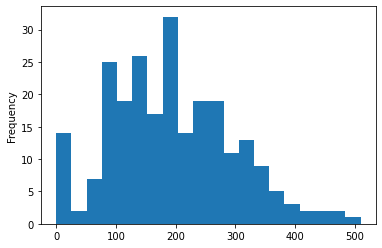

In [16]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
df['calories'].plot.hist(bins=20)

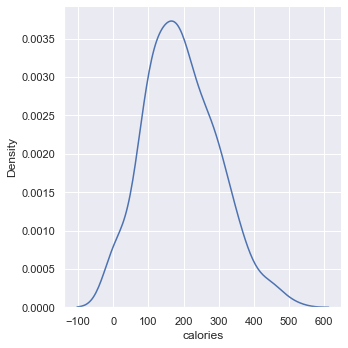

In [17]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.set()
sns.displot(data=df, x="calories", kind="kde")

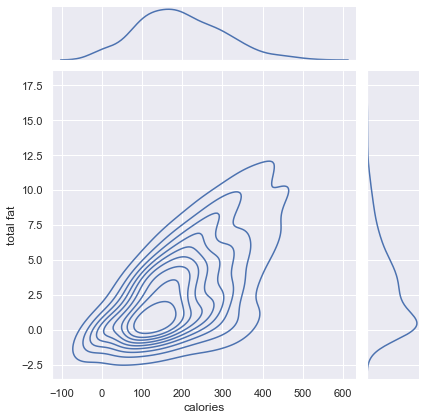

In [18]:
# plot calories against total fat using seaborn
sns.jointplot(data=df, x="calories", y="total fat", kind="kde")

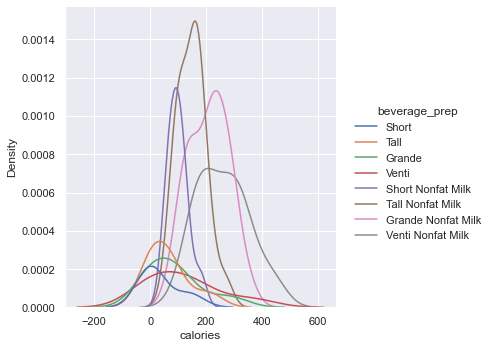

In [21]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.
sized = df[df.beverage_prep != '2% Milk']
sized = sized[sized.beverage_prep != 'Soymilk']
sized = sized[sized.beverage_prep != 'Solo']
sized = sized[sized.beverage_prep != 'Doppio']
sized = sized[sized.beverage_prep != 'Whole Milk']
sns.displot(data=sized, x="calories", hue="beverage_prep", kind="kde")
# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
